# Импорт библиотек

In [1]:
import gc

import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
sns.set(style="ticks", color_codes=True)

# Анализ данных

Источник данных: https://www.kaggle.com/c/microsoft-malware-prediction/data

In [2]:
data_path = '../data/train.csv'
data_submission_path = '../data/sample_submission.csv'

In [3]:
data = pd.read_csv(data_path)

c:\users\ilya\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1


In [5]:
data['HasDetections'].value_counts()

0    4462591
1    4458892
Name: HasDetections, dtype: int64

In [6]:
cols = data.columns.to_list()

In [7]:
print(*cols, sep="\n")

MachineIdentifier
ProductName
EngineVersion
AppVersion
AvSigVersion
IsBeta
RtpStateBitfield
IsSxsPassiveMode
DefaultBrowsersIdentifier
AVProductStatesIdentifier
AVProductsInstalled
AVProductsEnabled
HasTpm
CountryIdentifier
CityIdentifier
OrganizationIdentifier
GeoNameIdentifier
LocaleEnglishNameIdentifier
Platform
Processor
OsVer
OsBuild
OsSuite
OsPlatformSubRelease
OsBuildLab
SkuEdition
IsProtected
AutoSampleOptIn
PuaMode
SMode
IeVerIdentifier
SmartScreen
Firewall
UacLuaenable
Census_MDC2FormFactor
Census_DeviceFamily
Census_OEMNameIdentifier
Census_OEMModelIdentifier
Census_ProcessorCoreCount
Census_ProcessorManufacturerIdentifier
Census_ProcessorModelIdentifier
Census_ProcessorClass
Census_PrimaryDiskTotalCapacity
Census_PrimaryDiskTypeName
Census_SystemVolumeTotalCapacity
Census_HasOpticalDiskDrive
Census_TotalPhysicalRAM
Census_ChassisTypeName
Census_InternalPrimaryDiagonalDisplaySizeInInches
Census_InternalPrimaryDisplayResolutionHorizontal
Census_InternalPrimaryDisplayResolutio

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
IsBeta,8921483.0,7.509962e-06,2.740421e-03,0.0,0.0,0.0,0.000000e+00,1.000000e+00
RtpStateBitfield,8889165.0,6.845332e+00,1.026055e+00,0.0,7.0,7.0,7.000000e+00,3.500000e+01
IsSxsPassiveMode,8921483.0,1.733378e-02,1.305118e-01,0.0,0.0,0.0,0.000000e+00,1.000000e+00
DefaultBrowsersIdentifier,433438.0,1.658355e+03,9.989604e+02,1.0,788.0,1632.0,2.373000e+03,3.213000e+03
AVProductStatesIdentifier,8885262.0,4.784001e+04,1.403237e+04,3.0,49480.0,53447.0,5.344700e+04,7.050700e+04
AVProductsInstalled,8885262.0,1.326779e+00,5.229272e-01,0.0,1.0,1.0,2.000000e+00,7.000000e+00
AVProductsEnabled,8885262.0,1.020967e+00,1.675544e-01,0.0,1.0,1.0,1.000000e+00,5.000000e+00
HasTpm,8921483.0,9.879711e-01,1.090149e-01,0.0,1.0,1.0,1.000000e+00,1.000000e+00
CountryIdentifier,8921483.0,1.080490e+02,6.304706e+01,1.0,51.0,97.0,1.620000e+02,2.220000e+02
CityIdentifier,8596074.0,8.126653e+04,4.892339e+04,5.0,36825.0,82373.0,1.237000e+05,1.679620e+05


In [28]:
# True numerical columns according the description of the data
numerical_cols = [
    'Census_ProcessorCoreCount',
    'Census_PrimaryDiskTotalCapacity',
    'Census_SystemVolumeTotalCapacity',
    'Census_TotalPhysicalRAM',
    'Census_InternalPrimaryDiagonalDisplaySizeInInches',
    'Census_InternalPrimaryDisplayResolutionHorizontal',
    'Census_InternalPrimaryDisplayResolutionVertical',
    'Census_InternalBatteryNumberOfCharges'
]
categorical_cols = []

stat_cols = [('name', 'unique values', 'part of most popular')]

# Analisis each column and grouping by numeric and catecorical features
for col in cols[1:-1]:
    col_stat = data[col].value_counts()
    unique_values = len(col_stat)
    part_most_popular_val = col_stat.iloc[0] / col_stat.sum()
    stat_cols.append((col, unique_values, part_most_popular_val))
    
    if (col not in numerical_cols and part_most_popular_val <= 0.98):
        categorical_cols.append(col)

# Getting max width of each column for next printing
max_widths = []
stat_cols_transpose = np.asarray(stat_cols).transpose()
for row in stat_cols_transpose:
    max_widths.append(max( len(str(el)) for el in row ))

# Formatted printing
for row in stat_cols:
    formated_row = ''.join([str(el).ljust(max_widths[n]+2) for n,el in enumerate(row)])
    print(formated_row)

name                                               unique values  part of most popular  
ProductName                                        6              0.9893556934424468    
EngineVersion                                      70             0.43098966842171865   
AppVersion                                         110            0.5760504167300436    
AvSigVersion                                       8531           0.011468608974539322  
IsBeta                                             2              0.999992490037811     
RtpStateBitfield                                   7              0.9732620555473995    
IsSxsPassiveMode                                   2              0.9826662226448226    
DefaultBrowsersIdentifier                          2017           0.10625741167133478   
AVProductStatesIdentifier                          28970          0.6555310355507806    
AVProductsInstalled                                8              0.6987855844881108    
AVProductsEnabled    

In [37]:
print(f'Categorical_cols ({len(categorical_cols)} pieces):')
print(*categorical_cols, sep='\n')

Categorical_cols (58 pieces):
EngineVersion
AppVersion
AvSigVersion
RtpStateBitfield
DefaultBrowsersIdentifier
AVProductStatesIdentifier
AVProductsInstalled
AVProductsEnabled
CountryIdentifier
CityIdentifier
OrganizationIdentifier
GeoNameIdentifier
LocaleEnglishNameIdentifier
Platform
Processor
OsVer
OsBuild
OsSuite
OsPlatformSubRelease
OsBuildLab
SkuEdition
IsProtected
IeVerIdentifier
SmartScreen
Firewall
Census_MDC2FormFactor
Census_OEMNameIdentifier
Census_OEMModelIdentifier
Census_ProcessorManufacturerIdentifier
Census_ProcessorModelIdentifier
Census_ProcessorClass
Census_PrimaryDiskTypeName
Census_HasOpticalDiskDrive
Census_ChassisTypeName
Census_PowerPlatformRoleName
Census_InternalBatteryType
Census_OSVersion
Census_OSArchitecture
Census_OSBranch
Census_OSBuildNumber
Census_OSBuildRevision
Census_OSEdition
Census_OSSkuName
Census_OSInstallTypeName
Census_OSInstallLanguageIdentifier
Census_OSUILocaleIdentifier
Census_OSWUAutoUpdateOptionsName
Census_GenuineStateName
Census_Activa

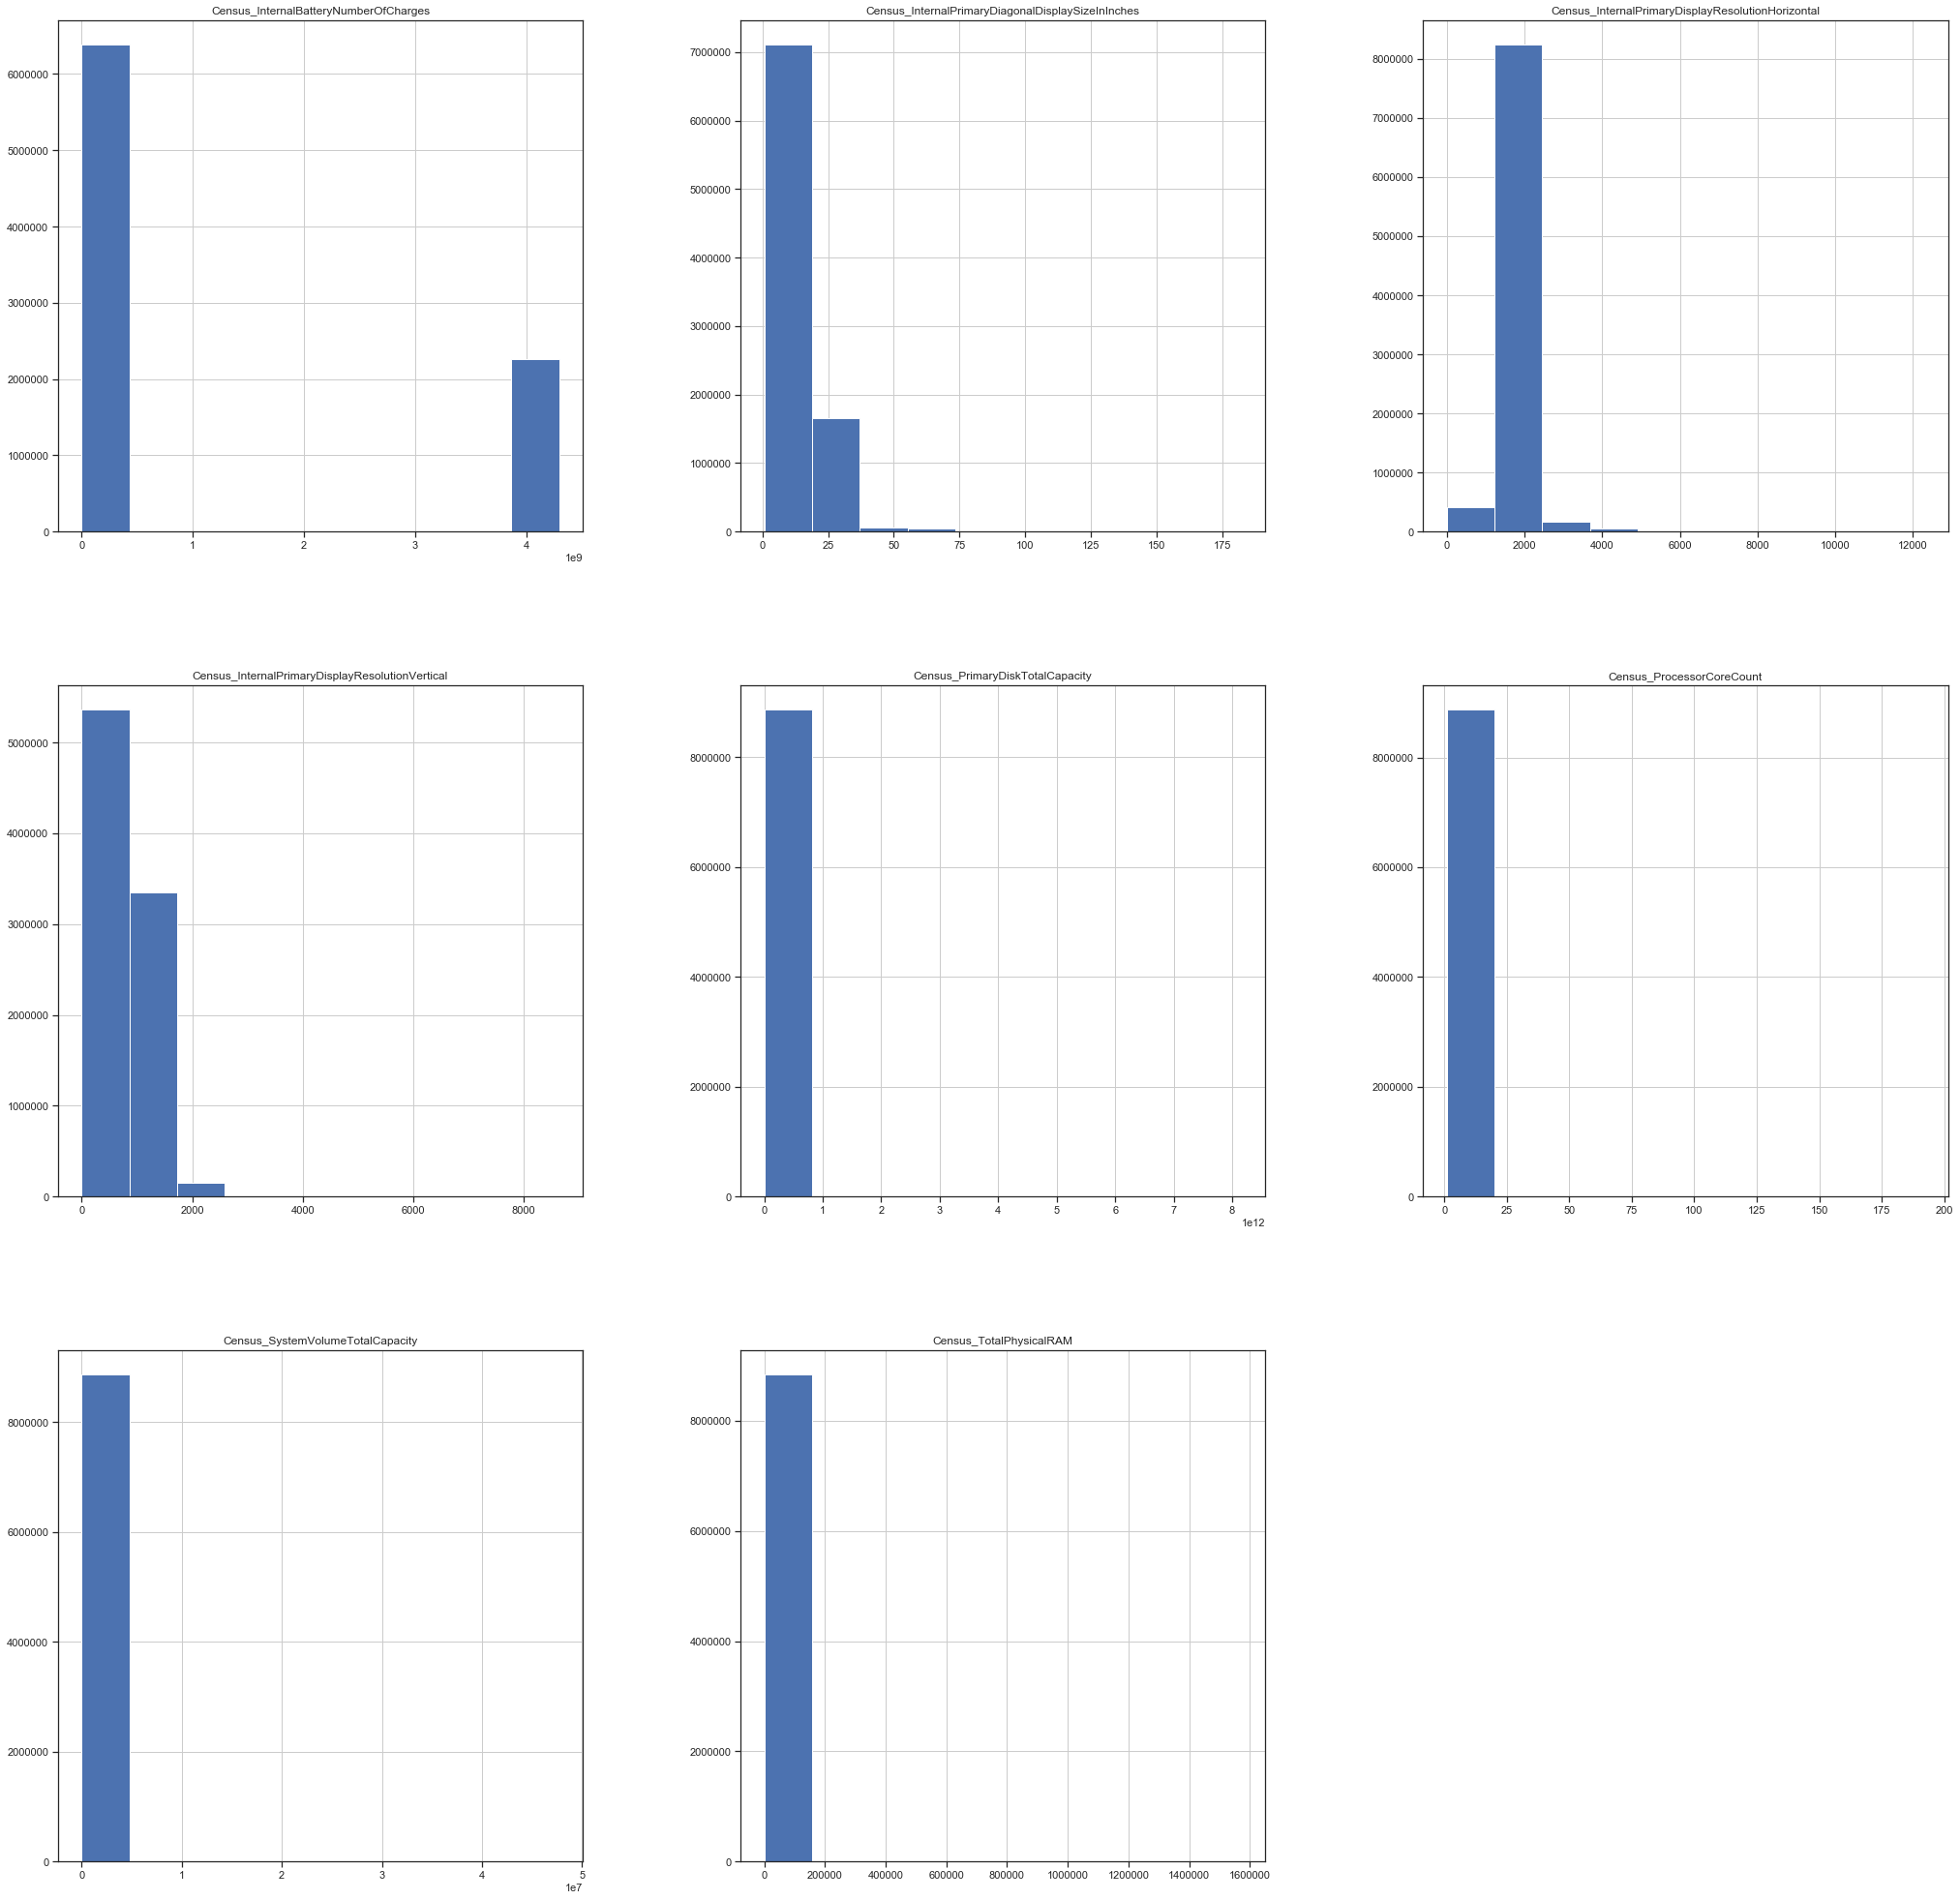

In [38]:
_ = data[numerical_cols].hist(figsize=(35,35))

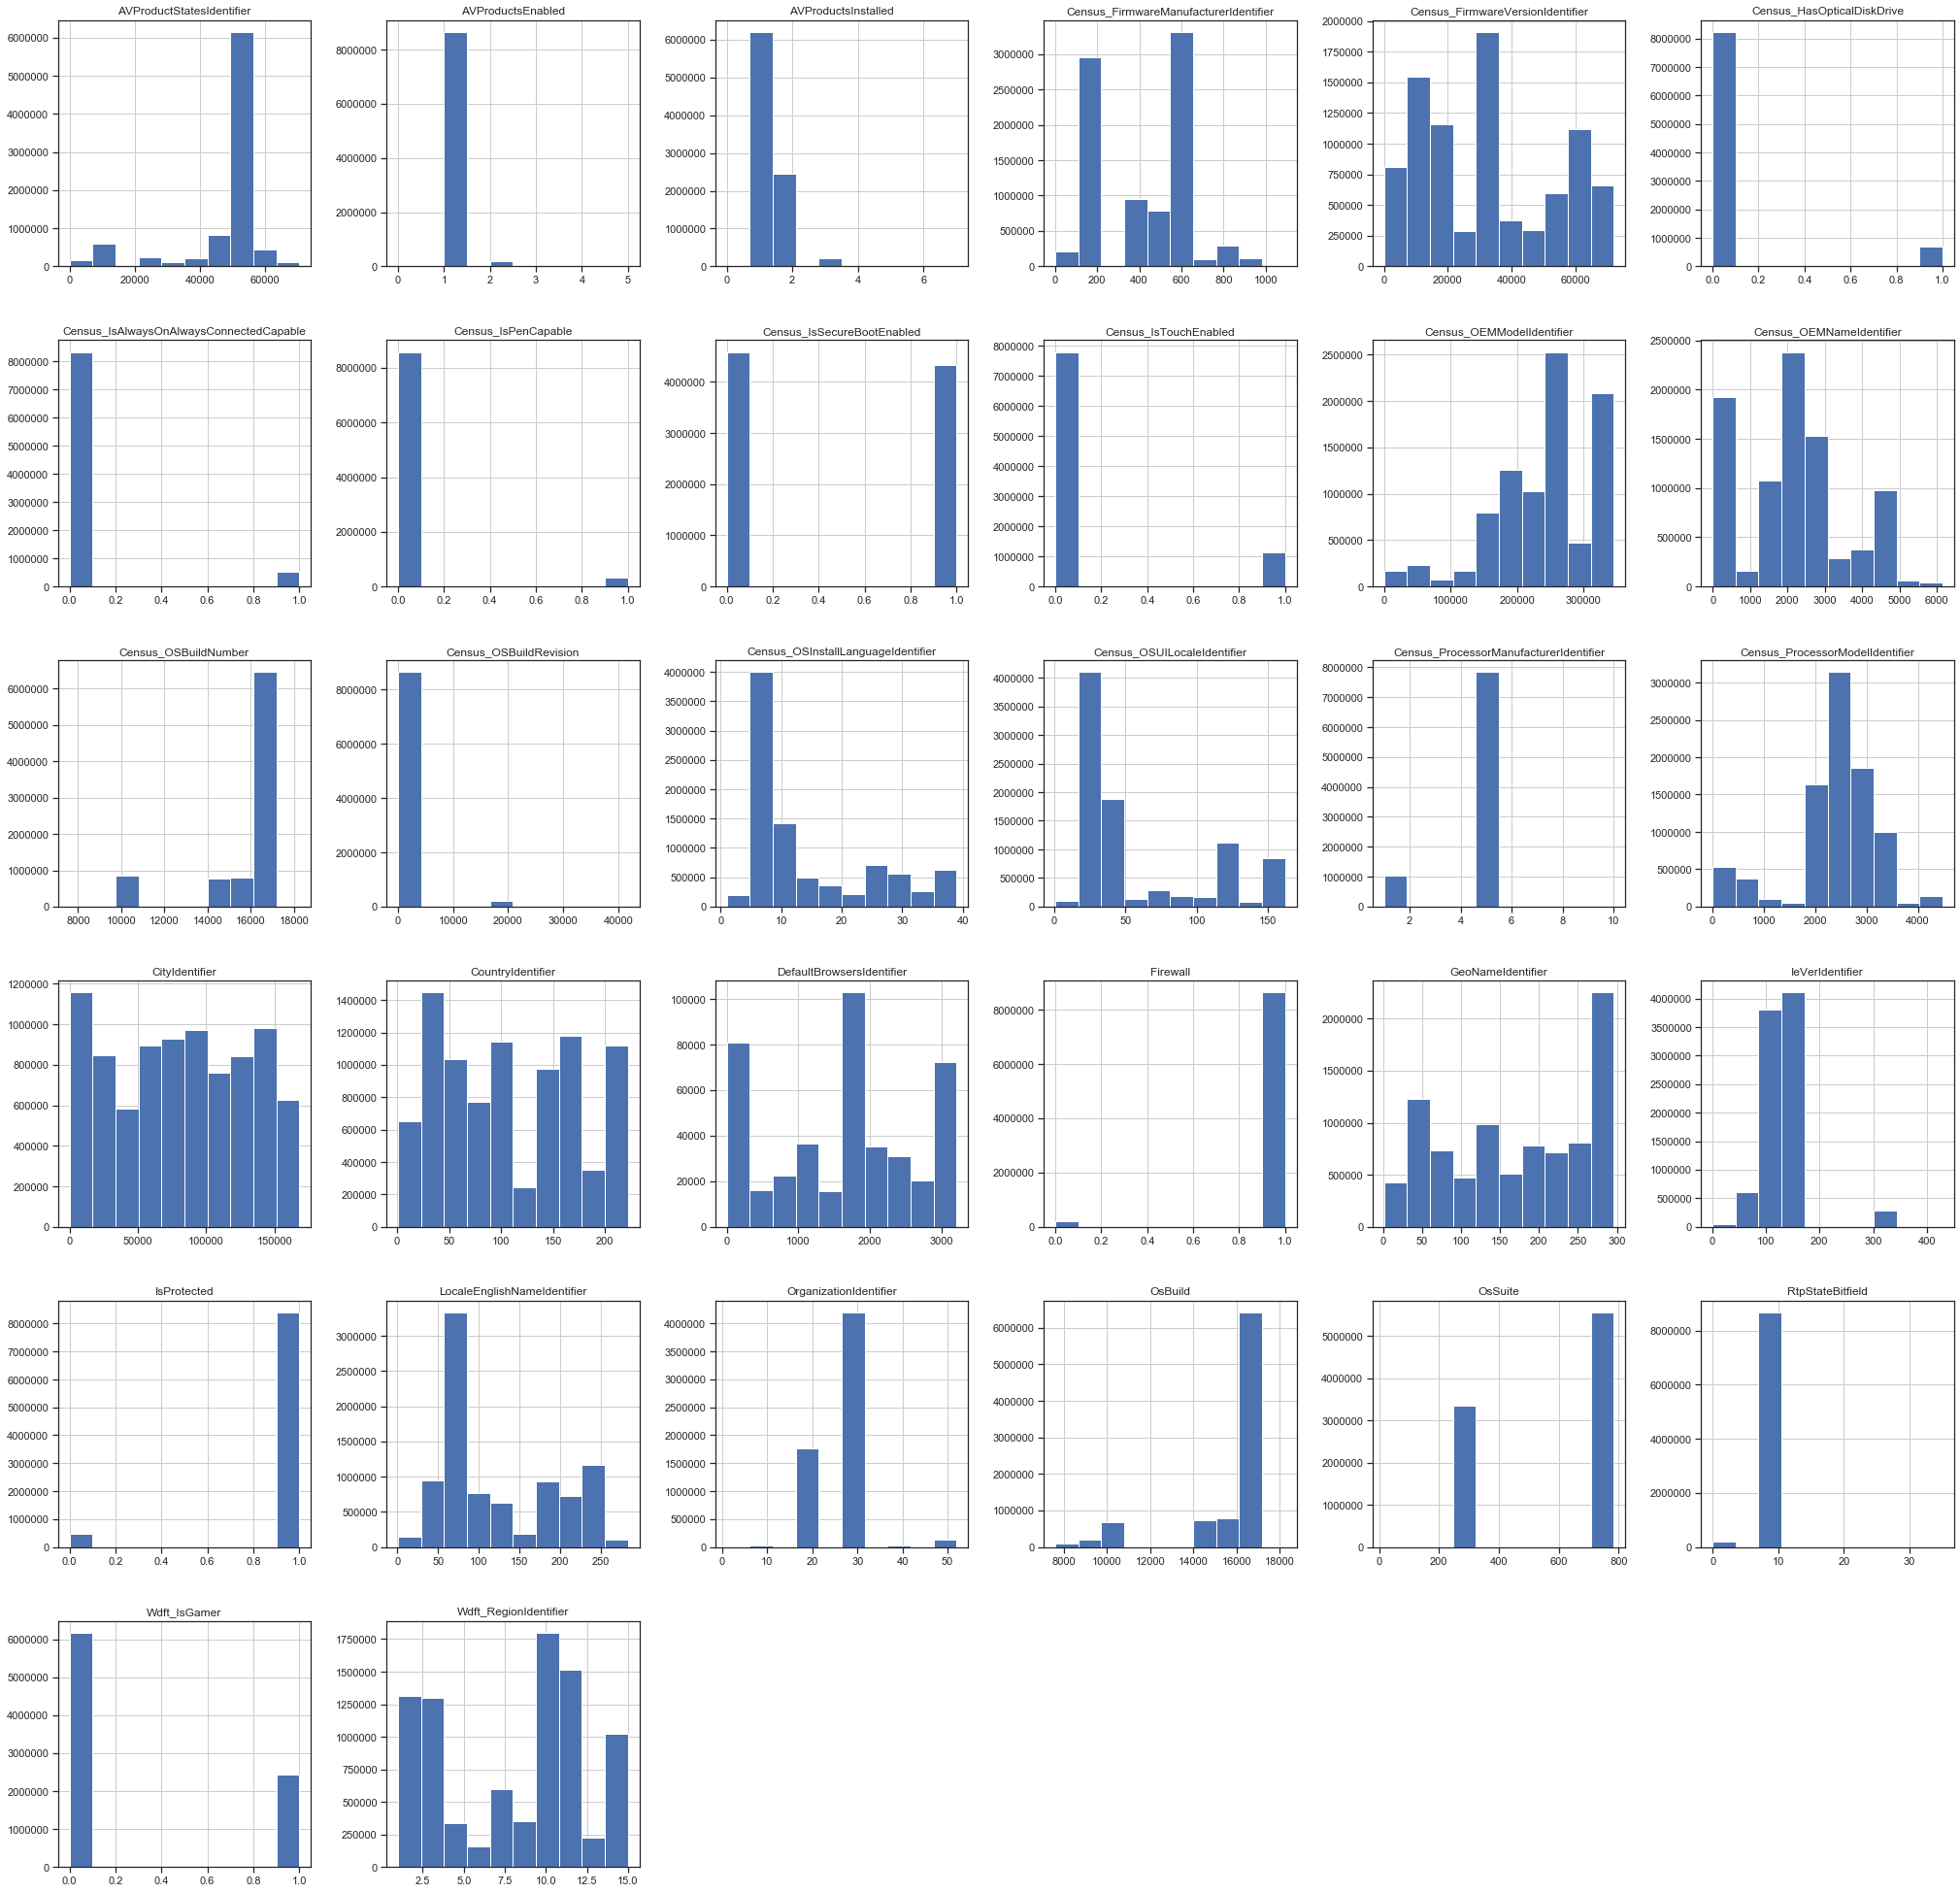

In [39]:
_2 = data[categorical_cols].hist(figsize=(35,35))